<b>Import gurobipy module to perform optimization for linear programming problems</b>

In [1]:
from gurobipy import *

<b>Define the model</b>

In [10]:
college = Model('fred-sally-daughter-college.lp')

<b>Add Variables to the model</b>
<p>There are four investments available to Merrit family.<br>
Each variable equals initial amount invested in each plan<br>
at beginning of each year</p>

In [3]:
a1 = college.addVar(name='Amount of money placed in Inv A at start of year 1')
a2 = college.addVar(name='Amount of money placed in Inv A at start of year 2')
a3 = college.addVar(name='Amount of money placed in Inv A at start of year 3')
a4 = college.addVar(name='Amount of money placed in Inv A at start of year 4')
a5 = college.addVar(name='Amount of money placed in Inv A at start of year 5')
a6 = college.addVar(name='Amount of money placed in Inv A at start of year 6')
a7 = college.addVar(name='Amount of money placed in Inv A at start of year 7')
b1 = college.addVar(name='Amount of money placed in Inv B at start of year 1')
b3 = college.addVar(name='Amount of money placed in Inv B at start of year 3')
b5 = college.addVar(name='Amount of money placed in Inv B at start of year 5')
b7 = college.addVar(name='Amount of money placed in Inv B at start of year 7')
c1 = college.addVar(name='Amount of money placed in Inv C at start of year 1')
c4 = college.addVar(name='Amount of money placed in Inv C at start of year 4')
d1 = college.addVar(name='Amount of money placed in Inv D at start of year 1')

<b>Set the Objective function to minimize the initial investment</b>

In [4]:
college.setObjective(a1 + b1 + c1 + d1, GRB.MINIMIZE)

<b>Display the excel containing Cash Inflow/Outflow data</b>

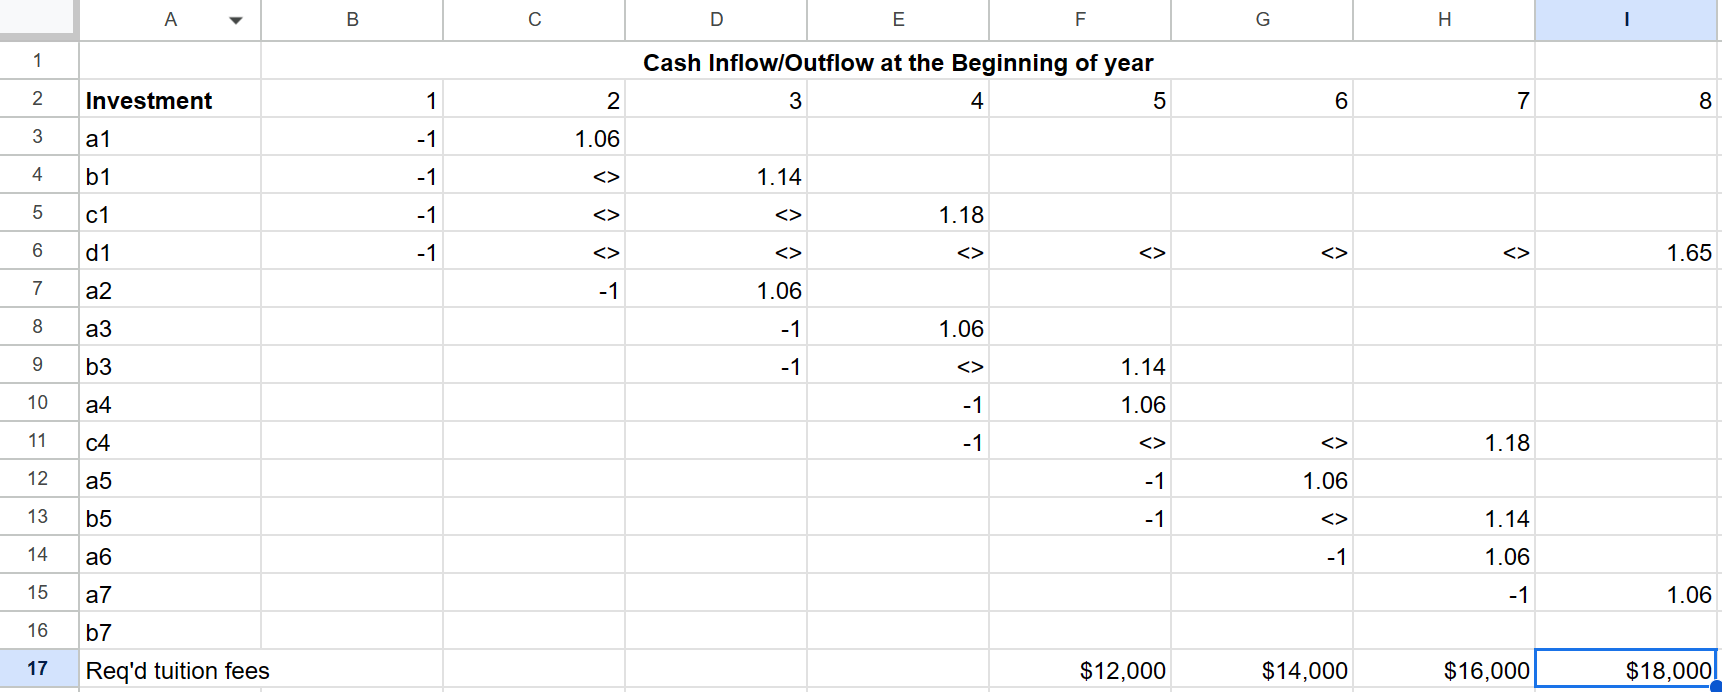

In [5]:
from PIL import Image
Image.open("./Screenshot 2023-04-22 180040.png")

In [6]:
college.addConstr(1.06*a1 - a2 == 0)
college.addConstr(1.14*b1 + 1.06*a2 - a3 - b3 == 0)
college.addConstr(1.18*c1 + 1.06*a3 - a4 - c4 == 0)
college.addConstr(1.14*b3 + 1.06*a4 - a5 - b5 == 12000)
college.addConstr(1.06*a5 - a6 == 14000)
college.addConstr(1.18*c4 + 1.14*b5 + 1.06*a6 - a7 == 16000)
college.addConstr(1.65*d1 + 1.06*a7 == 18000)

<gurobi.Constr *Awaiting Model Update*>

<b>Formula to write the constraints</b>


<style type="text/css">
* {margin: 1; padding: 1;}
#container {height: 100%; width:100%; font-size: 0;}
#left, #middle, #right, #lm, #mr {display: inline-block; *display: inline; zoom: 1.5; vertical-align: top; font-size: 13px;}
#left {width: 29%;}
#lm {width: 6%}
#middle {width: 29%;}
#mr {width: 6%}
#right {width: 29%; }
</style>
</head>
<body>
<div id="container">
    <div id="left">Total amount maturing<br>
    at the beginning<br>
    of year </div>
    <div id="lm"> <br>- </div>
    <div id="middle">Total amount reinvested<br>
    at the beginning<br>
    of year</div>
    <div id="mr"> <br>= </div>
    <div id="right">Tuition fees
due at the 
beginning
of the year</div>
</div>

<b>Save the model along with its parametes to a file</b>

In [11]:
college.write('fred-sally-daughter-college.lp')

<b>Use gurobi optimizations</b>

In [8]:
college.optimize()

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G7 CPU @ 1.20GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7 rows, 14 columns and 22 nonzeros
Model fingerprint: 0x55a829d6
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 2e+04]
Presolve removed 7 rows and 14 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.1105024e+04   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  4.110502419e+04


<b>Print the result</b>

In [9]:
for v in college.getVars():
    print(v.varName, v.x)

Amount of money placed in Inv A at start of year 1 0.0
Amount of money placed in Inv A at start of year 2 0.0
Amount of money placed in Inv A at start of year 3 0.0
Amount of money placed in Inv A at start of year 4 0.0
Amount of money placed in Inv A at start of year 5 13207.54716981132
Amount of money placed in Inv A at start of year 6 0.0
Amount of money placed in Inv A at start of year 7 0.0
Amount of money placed in Inv B at start of year 1 30195.93327878545
Amount of money placed in Inv B at start of year 3 34423.36393781541
Amount of money placed in Inv B at start of year 5 14035.087719298246
Amount of money placed in Inv B at start of year 7 0.0
Amount of money placed in Inv C at start of year 1 0.0
Amount of money placed in Inv C at start of year 4 0.0
Amount of money placed in Inv D at start of year 1 10909.09090909091


<b>Summary</b>

<p>The Merrit family can pay for their daughter's college tuition fees<br>
with minimal initial investment amount if they invest: <br>
<div><em>
$30195 in Investment B at start of year 1<br>
$10909 in Investment D at start of year 1<br>
$34423 in Investment B at start of year 3<br>
$13208 in Investment A at start of year 5<br></em></div>
$14036 in Investment B at start of year 5</p>